In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
%matplotlib inline

In [2]:
data = np.load('../data/data_pca_50_y_mean.pickle.npz')
data.files

['arr_0', 'arr_1', 'arr_2']

In [3]:
X = data['arr_0']
y = data['arr_1']
mean = data['arr_2']

In [4]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,stratify=y)
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((4368, 50), (1093, 50), (4368,), (1093,))

In [5]:
# Training a Machine Learning Model

In [6]:
from sklearn.svm import SVC

In [11]:
model = SVC(C=1.0,kernel='rbf',gamma=0.01, probability=True)

In [12]:
model.fit(x_train,y_train)
print('model trained successfully')

model trained successfully


In [13]:
# score
model.score(x_train,y_train)

0.8608058608058609

In [14]:
# score
model.score(x_test,y_test)

0.7932296431838975

In [15]:
# Model Evaluation
# - Confusion Matrix
# - Classoification Report
# - Kappa Score
# - ROC and AUC (probability)

In [16]:
from sklearn import metrics

In [19]:
y_pred = model.predict(x_test)
y_prob = model.predict_proba(x_test) # probability

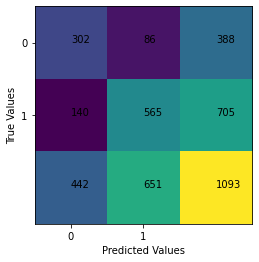

In [30]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [36]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.778351,0.683258,0.727711,442.00000
female,0.801418,0.867896,0.833333,651.00000
accuracy,0.793230,0.793230,0.793230,0.79323
macro avg,0.789884,0.775577,0.780522,1093.00000
weighted avg,0.792090,0.793230,0.790620,1093.00000


In [37]:
# Kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5621785259784686

In [38]:
# ROC and AUC

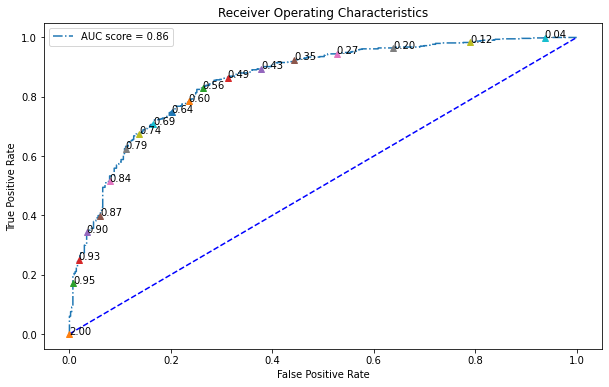

In [52]:
# roc for female
fpr,tpr, thresh =metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])

plt.legend(['AUC score = %0.2f'%auc_s])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

In [53]:
# Hyper Paramter Tuning 

In [54]:
model_tune = SVC()

In [55]:
from sklearn.model_selection import GridSearchCV

In [58]:
param_grid = {'C':[1,10,20,30,50,100],
              'kernel':['rbf','poly'],
              'gamma':[0.1,0.05,0.01,0.001,0.002,0.005],
              'coef0':[0,1],}

In [63]:
model_grid = GridSearchCV(model_tune,param_grid=param_grid,scoring='accuracy',cv=5,verbose=1)

In [64]:
model_grid.fit(X,y)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20, 30, 50, 100], 'coef0': [0, 1],
                         'gamma': [0.1, 0.05, 0.01, 0.001, 0.002, 0.005],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [66]:
model_grid.best_index_

17

In [67]:
model_grid.best_params_

{'C': 1, 'coef0': 1, 'gamma': 0.01, 'kernel': 'poly'}

In [68]:
model_grid.best_score_

0.7886827262399082

In [74]:
# With best parameter build ML model
model_best = SVC(C=1,kernel='poly',gamma=0.01,coef0=1, probability=True)

In [75]:
model_best.fit(x_train,y_train)
model_best.score(x_test,y_test)

0.7950594693504117

In [76]:
y_pred = model_best.predict(x_test)
y_prob = model_best.predict_proba(x_test) # probability

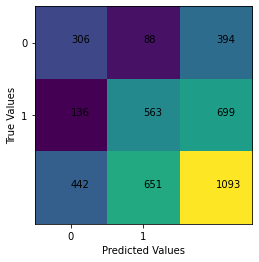

In [77]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm = np.concatenate((cm,cm.sum(axis=0).reshape(1,-1)),axis=0)
cm = np.concatenate((cm,cm.sum(axis=1).reshape(-1,1)),axis=1)
plt.imshow(cm)
for i in range(3):
    for j in range(3):
        plt.text(i,j,'%d'%cm[i,j])
        
plt.xticks([0,1])
plt.yticks([0,1])
plt.xlabel('Predicted Values')
plt.ylabel('True Values')
plt.show()

In [79]:
# classification report
cr = metrics.classification_report(y_test,y_pred,target_names=['male','female'],output_dict=True)
pd.DataFrame(cr).T

,precision,recall,f1-score,support
male,0.776650,0.692308,0.732057,442.000000
female,0.805436,0.864823,0.834074,651.000000
accuracy,0.795059,0.795059,0.795059,0.795059
macro avg,0.791043,0.778566,0.783066,1093.000000
weighted avg,0.793795,0.795059,0.792819,1093.000000


In [81]:
# Kappa
metrics.cohen_kappa_score(y_test,y_pred)

0.5670154142172987

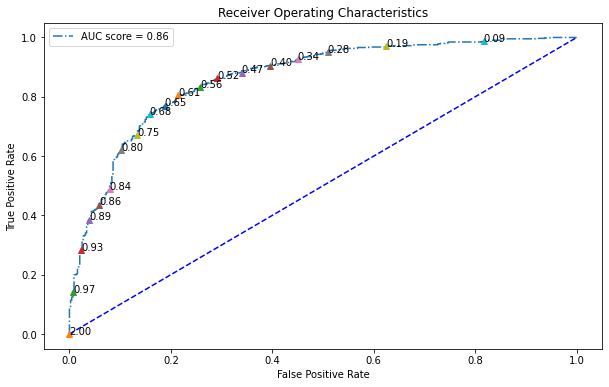

In [83]:
# roc for female
fpr,tpr, thresh =metrics.roc_curve(y_test,y_prob[:,1])
auc_s = metrics.auc(fpr,tpr)
plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,'-.')
plt.plot([0,1],[0,1],'b--')
for i in range(0,len(thresh),20):
    plt.plot(fpr[i],tpr[i],'^')
    plt.text(fpr[i],tpr[i],"%0.2f"%thresh[i])

plt.legend(['AUC score = %0.2f'%auc_s])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristics')
plt.show()

In [84]:
# save our machine learning model
import pickle

In [85]:
pickle.dump(model_best,open('model_svm.pickle','wb'))

In [86]:
pickle.dump(mean,open('../model/mean_preprocess.pickle','wb'))